In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [2]:
df=pd.read_csv('C://Users//ASUS//Downloads//My Projects//Machine Learning Projects//Weather Prediction//seattle-weather.csv')

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.shape

(1461, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
for col in df.columns:
    print(f'{col} ---> {df[col].nunique()}')

date ---> 1461
precipitation ---> 111
temp_max ---> 67
temp_min ---> 55
wind ---> 79
weather ---> 5


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [9]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [11]:
df['date']=pd.to_datetime(df['date'])

df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [12]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [13]:
df.drop(columns='date',inplace=True)

In [14]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5


In [16]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

column=['precipitation','temp_max','temp_min','wind']
min_max_scaler=MinMaxScaler()
df[column]=min_max_scaler.fit_transform(df[column])

In [17]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.000000,0.387097,0.476378,0.472527,drizzle,2012,1,1
1,0.194991,0.327957,0.389764,0.450549,rain,2012,1,2
2,0.014311,0.357527,0.562992,0.208791,rain,2012,1,3
3,0.363148,0.370968,0.500000,0.472527,rain,2012,1,4
4,0.023256,0.282258,0.389764,0.626374,rain,2012,1,5


In [18]:
encoder=LabelEncoder()
df['weather']=encoder.fit_transform(df['weather'])

In [19]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.000000,0.387097,0.476378,0.472527,0,2012,1,1
1,0.194991,0.327957,0.389764,0.450549,2,2012,1,2
2,0.014311,0.357527,0.562992,0.208791,2,2012,1,3
3,0.363148,0.370968,0.500000,0.472527,2,2012,1,4
4,0.023256,0.282258,0.389764,0.626374,2,2012,1,5


<Axes: >

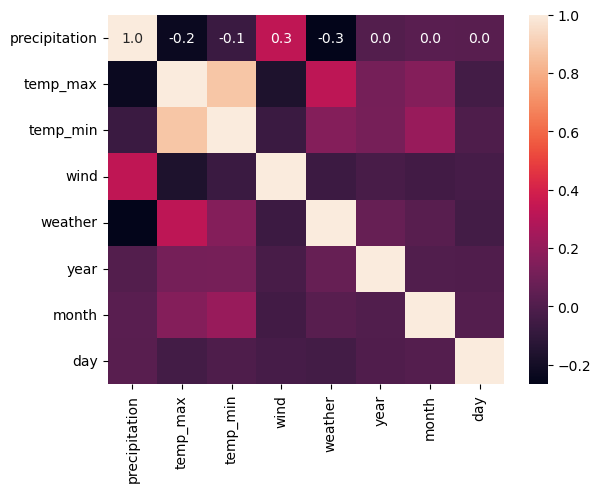

In [24]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')

In [26]:
df.drop(columns='temp_max',inplace=True)

<Axes: >

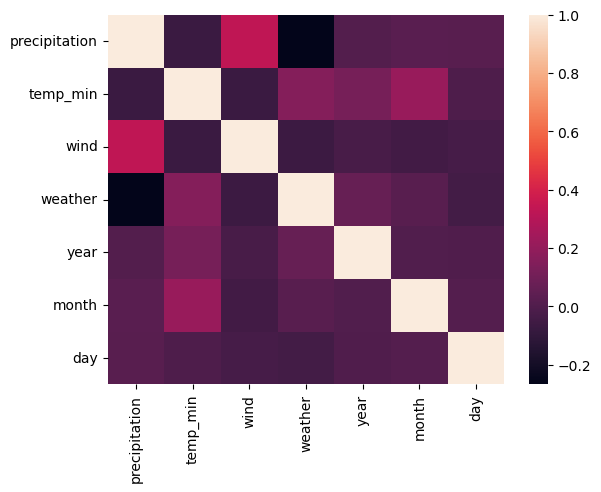

In [27]:
sns.heatmap(df.corr())

In [30]:
date_column=['day','month','year']
df[date_column]=min_max_scaler.fit_transform(df[date_column])
df.head()

,precipitation,temp_min,wind,weather,year,month,day
0,0.000000,0.476378,0.472527,0,0.0,0.0,0.000000
1,0.194991,0.389764,0.450549,2,0.0,0.0,0.033333
2,0.014311,0.562992,0.208791,2,0.0,0.0,0.066667
3,0.363148,0.500000,0.472527,2,0.0,0.0,0.100000
4,0.023256,0.389764,0.626374,2,0.0,0.0,0.133333


In [32]:
df.year.unique()

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [33]:
df.day.unique()

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ])

In [34]:
df.month.unique()

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

In [35]:
x=df[['precipitation','temp_min','wind','year','month','day']]
y=df['weather']


In [36]:
x.head()

,precipitation,temp_min,wind,year,month,day
0,0.000000,0.476378,0.472527,0.0,0.0,0.000000
1,0.194991,0.389764,0.450549,0.0,0.0,0.033333
2,0.014311,0.562992,0.208791,0.0,0.0,0.066667
3,0.363148,0.500000,0.472527,0.0,0.0,0.100000
4,0.023256,0.389764,0.626374,0.0,0.0,0.133333


<Axes: >

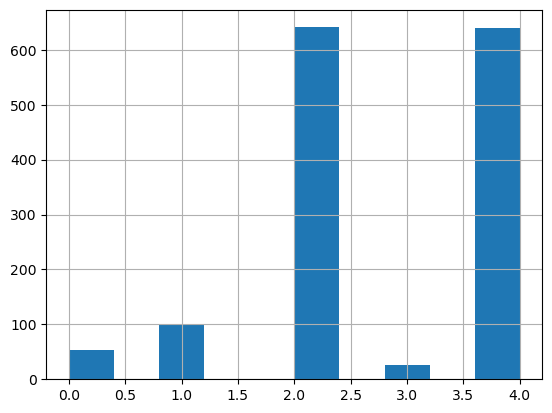

In [37]:
y.hist()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
models={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(kernel='rbf'),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=3),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=3)
}

In [48]:
    for model_name,model in models.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        print(f'{model_name} accuracy: {round(accuracy_score(y_test,y_pred)*100,2)}%')
        print()

LogisticRegression accuracy: 70.65%

SVC accuracy: 72.35%

RandomForestClassifier accuracy: 78.5%

GaussianNB accuracy: 83.62%

KNeighborsClassifier accuracy: 64.16%



In [52]:
from sklearn.metrics import confusion_matrix,classification_report

optimized_model=models['GaussianNB']
optimized_model.fit(x_train,y_train)
y_pred=optimized_model.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'GaussianNB Accuracy: {accuracy}%\n')

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(report)




GaussianNB Accuracy: 83.62%

Confusion Matrix:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 110   2   8]
 [  0   0   4   4   0]
 [  0   0   0   0 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.96      0.92      0.94       120
           3       0.67      0.50      0.57         8
           4       0.76      1.00      0.86       131

    accuracy                           0.84       293
   macro avg       0.48      0.48      0.47       293
weighted avg       0.75      0.84      0.79       293



c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
